In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np


In [4]:
train_dir = r"D:\.coding\VScodeProjects\Internships\NIELIT\archive\train"
test_dir = r"D:\.coding\VScodeProjects\Internships\NIELIT\archive\test"

train_op = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.20
)


In [5]:
# creating TRAINING data generator
train_generator = train_op.flow_from_directory(
    train_dir,
    target_size = (300, 300),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)

# creating VALIDATION data generator
val_generator = train_op.flow_from_directory(
    train_dir,
    target_size = (300, 300),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)


Found 2198 images belonging to 5 classes.
Found 548 images belonging to 5 classes.


In [6]:
# creating CNN
model1 = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3, 3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(256, (3, 3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(512, activation= 'relu'), #FCN
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax') #output layer with softmax where we pass no. of class labels
])

C:\Users\subra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# set up the model"s training configuration
model1.compile(
    optimizer= Adam(learning_rate = 0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [8]:
es = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    verbose = 2,
    restore_best_weights = True)

history = model1.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 100,
    callbacks = [es]
)


Epoch 1/100


C:\Users\subra\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.2927 - loss: 1.8188 - val_accuracy: 0.3869 - val_loss: 1.4679
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.4733 - loss: 1.2513 - val_accuracy: 0.5383 - val_loss: 1.1204
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.5691 - loss: 1.0562 - val_accuracy: 0.5949 - val_loss: 1.0516
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.5843 - loss: 0.9884 - val_accuracy: 0.5803 - val_loss: 1.0634
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.6050 - loss: 0.9743 - val_accuracy: 0.6186 - val_loss: 0.9401
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.6377 - loss: 0.9127 - val_accuracy: 0.6387 - val_loss: 0.9194
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.6596 - loss: 0.8764 - val_accuracy: 0.6405 - val_loss: 0.8949
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.6548 - loss: 0.8574 - val_accuracy: 0.6259 - val_los

In [9]:
model1.save(r"D:\.coding\VScodeProjects\Internships\NIELIT\ClassificationData2.h5")

In [1]:
def predict(model, image):
    im_array = tensorflow.keras.utils.img_to_array(image[i].numpy())
    im_array = tensorflow.expand_dim(im_array, 0)
    predictions = model.predict(im_array)

    # get the index of the highest confidence score in the prediction array for a single image 
    predicted_class = class_names[np.argmax(predictions[0])]

    # get the highest confidence score
    score = np.max(predictions[0])  # np.max(predictions[0]) gives the highest confidence score
    score = round(100*(np.max(predictions[0])),0)
    return predicted_class, score


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


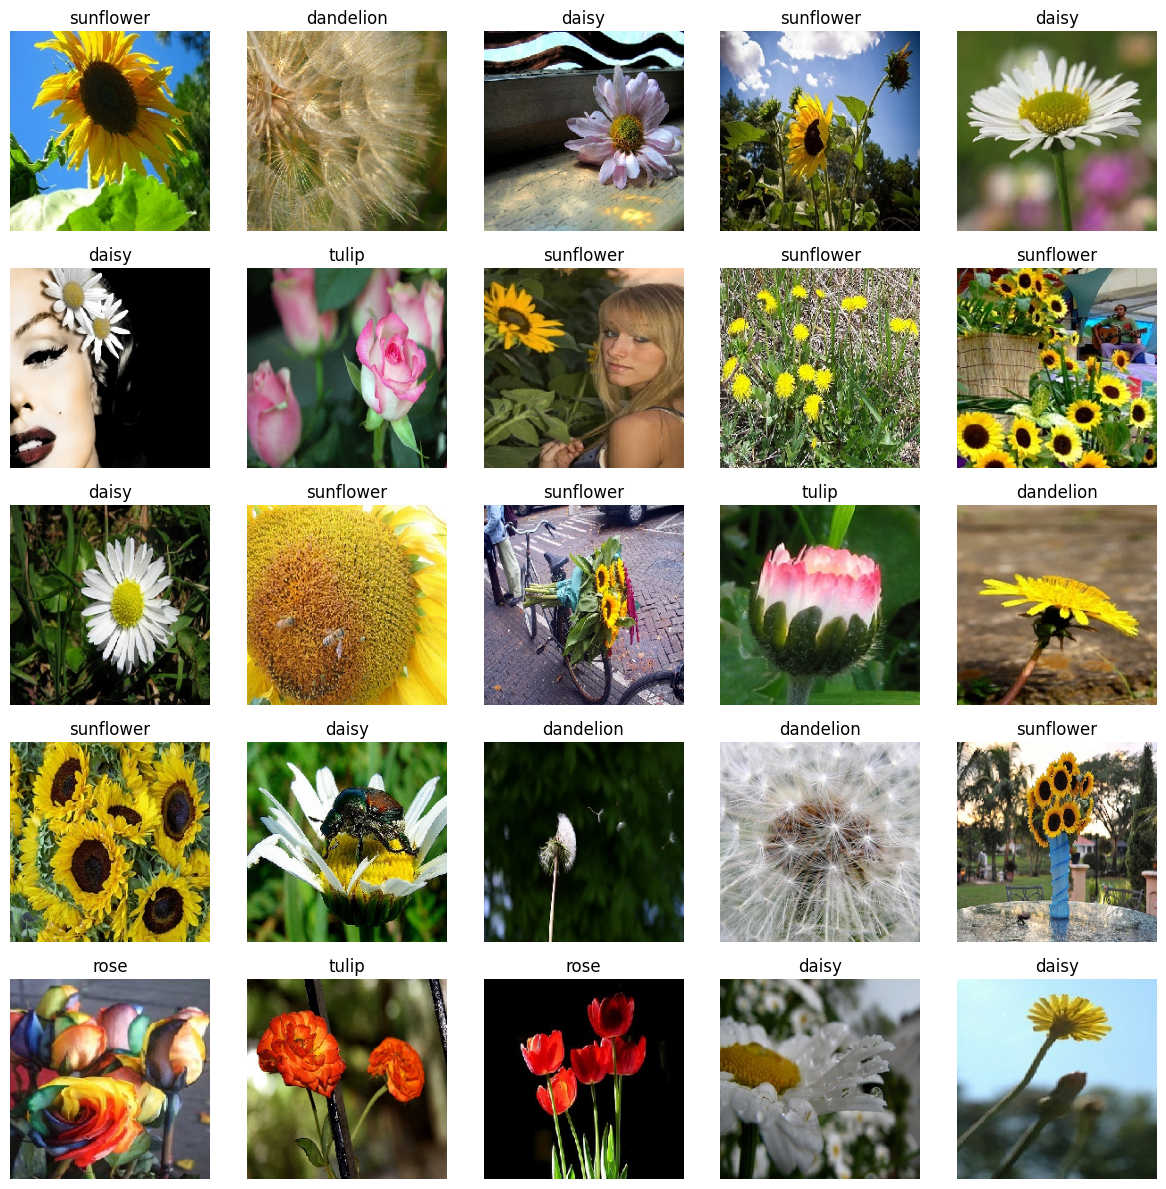

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the class labels
class_labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Load the trained model
model = tf.keras.models.load_model(r"D:\.coding\VScodeProjects\Internships\NIELIT\ClassificationData.h5")

# Preprocess a single image
def preprocess_image(image_path, target_size=(300,300)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

# Make predictions on the test dataset
test_images_dir = r'D:\.coding\VScodeProjects\Internships\NIELIT\archive\test'
test_images = [os.path.join(test_images_dir, img) for img in os.listdir(test_images_dir)]

# Plotting the images with their predicted labels
plt.figure(figsize=(12, 12))

for i, image_path in enumerate(test_images[:25]):  # Display the first 25 test images
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    # Load the image for displaying
    img = load_img(image_path, target_size=(224, 224))

    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.title(predicted_class)
    plt.axis('off')

plt.tight_layout()
plt.show()
